In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from os import listdir

In [24]:
def main():
    cycles_to_plot=4000
    for x in listdir('../Graphs/Galv/LHCE'):
        if '' in x:  #Replace '' with key indicator for file to be read. E.g. '' will read all files, 'example' will handle files with example in the name.
            battery_dict=open_land_file(x)
            battery_dict['name']='_'.join(x.split('_')[0:-2])
            print(battery_dict['name'])
            
            if battery_dict['name'] not in os.listdir('../Graphs/Galv/LHCE'):
                os.mkdir('../Graphs/Galv/LHCE'+battery_dict['name'])
                    
            plot_comparison_cap_watt_kvot(battery_dict['sum_cycle'], cycles_to_plot,battery_dict['name'])
        
            plot_Voltage_VS_capacity(battery_dict['record'],cycles_to_plot,battery_dict['name'])
            #write_df_to_db(standard_df_for_db(battery_dict['record'],battery_dict['name']))  #Can be uncommented if you use a database
main()

Open land data file

In [5]:
def open_land_file(file_name):
    file_name = '../Cycling/Landt/LHCE/1.5M LiFSI in TEP_BTFE210210_007_3.xls'
    xl = pd.ExcelFile(file_name)
    record_df=pd.read_excel(xl, sheet_name='Record', header=0)
    return record_df

In [99]:
file_name = '../Cycling/Landt/LHCE/1.5M LiFSI in TEP_BTFE210210_007_3.xls'
file_name2 = file_name[22:-3]
file_name2

'1.5M LiFSI in TEP_BTFE210210_007_3.'

In [6]:
open_land_file('../Cycling/Landt/LHCE/1.5M LiFSI in TEP_BTFE210210_007_3.xls')

,Index,TestTime/h,Voltage/V,Current/mA,Capacity/mAh,SCapacity/mAh/g,SEnergy/Wh/kg,State
0,1,0.00,3.8756,0.0000,0.0000,0.0,0.0,R
1,2,0.00,3.8762,0.0000,0.0000,0.0,0.0,R
2,3,0.00,3.8778,0.0282,0.0000,0.0,0.0,C_Rate
3,4,0.01,3.8787,0.0282,0.0001,0.0,0.1,C_Rate
4,5,0.01,3.8799,0.0282,0.0002,0.1,0.3,C_Rate
...,...,...,...,...,...,...,...,...
12558,12559,56.29,4.1791,0.0561,0.2448,78.5,297.9,C_Rate
12559,12560,56.35,4.1992,0.0561,0.2487,79.7,303.1,C_Rate
12560,12561,56.36,4.2001,0.0564,0.2489,79.8,303.4,C_Rate
12561,12562,56.36,4.1933,0.0000,0.2489,79.8,303.4,R


In [7]:
file_name = '../Cycling/Landt/LHCE/1.5M LiFSI in TEP_BTFE210210_007_3.xls'
xl = pd.ExcelFile(file_name)
record_df=pd.read_excel(xl, sheet_name='Record', header=0)
sheet_list=xl.sheet_names
list_columns=record_df.columns
list_columns

Index(['Index', 'TestTime/h', 'Voltage/V', 'Current/mA', 'Capacity/mAh',
       'SCapacity/mAh/g', 'SEnergy/Wh/kg', 'State'],
      dtype='object')

In [8]:
record_df_list=[pd.read_excel(xl,sheet_name=x ,header=None,names=list_columns) for x in sheet_list if ('Record' in x) and (x!='Record')]
record_df_list

[]

In [9]:
record_df=[record_df]+record_df_list
record_df

[       Index  TestTime/h  Voltage/V  Current/mA  Capacity/mAh  \
 0          1        0.00     3.8756      0.0000        0.0000   
 1          2        0.00     3.8762      0.0000        0.0000   
 2          3        0.00     3.8778      0.0282        0.0000   
 3          4        0.01     3.8787      0.0282        0.0001   
 4          5        0.01     3.8799      0.0282        0.0002   
 ...      ...         ...        ...         ...           ...   
 12558  12559       56.29     4.1791      0.0561        0.2448   
 12559  12560       56.35     4.1992      0.0561        0.2487   
 12560  12561       56.36     4.2001      0.0564        0.2489   
 12561  12562       56.36     4.1933      0.0000        0.2489   
 12562  12563       56.36     4.1933      0.0000        0.2489   
 
        SCapacity/mAh/g  SEnergy/Wh/kg   State  
 0                  0.0            0.0       R  
 1                  0.0            0.0       R  
 2                  0.0            0.0  C_Rate  
 3        

In [10]:
record_df=pd.concat(record_df,ignore_index=True)
record_df

,Index,TestTime/h,Voltage/V,Current/mA,Capacity/mAh,SCapacity/mAh/g,SEnergy/Wh/kg,State
0,1,0.00,3.8756,0.0000,0.0000,0.0,0.0,R
1,2,0.00,3.8762,0.0000,0.0000,0.0,0.0,R
2,3,0.00,3.8778,0.0282,0.0000,0.0,0.0,C_Rate
3,4,0.01,3.8787,0.0282,0.0001,0.0,0.1,C_Rate
4,5,0.01,3.8799,0.0282,0.0002,0.1,0.3,C_Rate
...,...,...,...,...,...,...,...,...
12558,12559,56.29,4.1791,0.0561,0.2448,78.5,297.9,C_Rate
12559,12560,56.35,4.1992,0.0561,0.2487,79.7,303.1,C_Rate
12560,12561,56.36,4.2001,0.0564,0.2489,79.8,303.4,C_Rate
12561,12562,56.36,4.1933,0.0000,0.2489,79.8,303.4,R


In [11]:
state_list=record_df['State'].values
state_list

array(['R', 'R', 'C_Rate', ..., 'C_Rate', 'R', 'R'], dtype=object)

In [12]:
columns=record_df.columns
columns

Index(['Index', 'TestTime/h', 'Voltage/V', 'Current/mA', 'Capacity/mAh',
       'SCapacity/mAh/g', 'SEnergy/Wh/kg', 'State'],
      dtype='object')

In [13]:
def identify_cycle_sequence(start_mode):
    
    if 'Rate' in start_mode:
        sequence_list=['C_Rate','D_Rate']
    else:
        sequence_list=['C_CC','D_CC']
        
    if start_mode[0]=='D':
        sequence_list=[x for x in reversed(sequence_list)]
    return sequence_list

In [14]:
cycle_index_list=[None]*len(state_list)
#indentify initial_rest
cycle_start=0
if state_list[0]=='R':
    for x in range(len(state_list)):
        if state_list[x] != 'R':
            cycle_start=x
            break
        else:
            cycle_index_list[x]=0
else:
    cycle_start=0
print()
squence_list=identify_cycle_sequence(state_list[cycle_start])
cycle=1
sequence_index=0
for x in range(cycle_start,len(state_list)):
    if (state_list[x] != squence_list[sequence_index]) and (sequence_index==0):
        sequence_index+=1
    elif (state_list[x] == squence_list[0]) and (sequence_index==1):
        cycle+=1        
        sequence_index=0
                    
    cycle_index_list[x]=cycle

cycle_index_list[x]

4

In [15]:
record_df['Cycle']=cycle_index_list
del cycle_index_list
record_df

,Index,TestTime/h,Voltage/V,Current/mA,Capacity/mAh,SCapacity/mAh/g,SEnergy/Wh/kg,State,Cycle
0,1,0.00,3.8756,0.0000,0.0000,0.0,0.0,R,0
1,2,0.00,3.8762,0.0000,0.0000,0.0,0.0,R,0
2,3,0.00,3.8778,0.0282,0.0000,0.0,0.0,C_Rate,1
3,4,0.01,3.8787,0.0282,0.0001,0.0,0.1,C_Rate,1
4,5,0.01,3.8799,0.0282,0.0002,0.1,0.3,C_Rate,1
...,...,...,...,...,...,...,...,...,...
12558,12559,56.29,4.1791,0.0561,0.2448,78.5,297.9,C_Rate,4
12559,12560,56.35,4.1992,0.0561,0.2487,79.7,303.1,C_Rate,4
12560,12561,56.36,4.2001,0.0564,0.2489,79.8,303.4,C_Rate,4
12561,12562,56.36,4.1933,0.0000,0.2489,79.8,303.4,R,4


In [16]:
C_D_R_list=[x[0] for x in state_list]
C_D_R_list

['R',
 'R',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C'

In [17]:
def create_standard_operation_list(C_D_R_list):
    step_operation_list=[None]*len(C_D_R_list)
    for x in range(len(C_D_R_list)):
        if C_D_R_list[x]=='R':
            step_operation_list[x]='R'
        elif C_D_R_list[x]=='C_Rate' or C_D_R_list[x]=='C_CC':
            step_operation_list[x]='CC-Chg'
        elif C_D_R_list[x]=='D_Rate' or C_D_R_list[x]=='D_CC':
            step_operation_list[x]='CC-Dchg'
        
    return step_operation_list

In [18]:
record_df['Step Operation']=create_standard_operation_list(list(state_list))
del state_list
record_df['C/DC/R']=C_D_R_list #create universal indicator for charge, discharge and rest. (should also account for CCCV stuff)
record_df
del C_D_R_list

In [19]:
sum_cycle_df=pd.read_excel(xl,sheet_name='Cycle',header=0)
sum_cycle_df=sum_cycle_df.rename(columns={"Index": "Cycle"})
sum_cycle_df

,Cycle,Charge-Cap/mAh,Discharge-Cap/mAh,Charge-SCap/mAh/g,Discharge-SCap/mAh/g,Efficiency/%,Charge-Energy/mWh,Discharge-Energy/mWh,Mid_Volt/V,CC-Cap/mAh,...,FlatDSCap/mAh/g,FlatD/%,FlatDTime/h,CaptnC/F,CaptnD/F,rd/mOhm,Charge-SEng/Wh/kg,Discharge-SEng/Wh/kg,Disch-EndVolt/V,CapKeepD/%
0,1,0.1396,0.2725,44.7,87.4,0.00,0.561,1.022,3.8379,0.1396,...,63.7,72.98,7.0,0,0,186818,179.8,327.6,3.0001,0.00
1,2,0.2767,0.2608,88.7,83.6,94.25,1.051,0.979,3.8415,0.2767,...,61.1,73.05,6.8,0,0,197805,336.8,313.7,3.0001,95.70
2,3,0.2644,0.2505,84.7,80.3,94.75,1.004,0.940,3.8411,0.2644,...,58.6,72.99,6.5,0,0,208791,321.8,301.3,3.0001,96.05
3,4,0.2489,0.0000,79.8,0.0,0.00,0.947,0.000,0.0000,0.2489,...,0.0,0.00,0.0,0,0,0,303.4,0.0,0.0000,0.00


In [20]:
data_dict={'record':record_df,'sum_cycle':sum_cycle_df}
data_dict

{'record':        Index  TestTime/h  Voltage/V  Current/mA  Capacity/mAh  \
 0          1        0.00     3.8756      0.0000        0.0000   
 1          2        0.00     3.8762      0.0000        0.0000   
 2          3        0.00     3.8778      0.0282        0.0000   
 3          4        0.01     3.8787      0.0282        0.0001   
 4          5        0.01     3.8799      0.0282        0.0002   
 ...      ...         ...        ...         ...           ...   
 12558  12559       56.29     4.1791      0.0561        0.2448   
 12559  12560       56.35     4.1992      0.0561        0.2487   
 12560  12561       56.36     4.2001      0.0564        0.2489   
 12561  12562       56.36     4.1933      0.0000        0.2489   
 12562  12563       56.36     4.1933      0.0000        0.2489   
 
        SCapacity/mAh/g  SEnergy/Wh/kg   State  Cycle Step Operation C/DC/R  
 0                  0.0            0.0       R      0              R      R  
 1                  0.0            0.0  

In [21]:
sum_cycle_df_columns=sum_cycle_df.columns
print(list(sum_cycle_df_columns))

['Cycle', 'Charge-Cap/mAh', 'Discharge-Cap/mAh', 'Charge-SCap/mAh/g', 'Discharge-SCap/mAh/g', 'Efficiency/%', 'Charge-Energy/mWh', 'Discharge-Energy/mWh', 'Mid_Volt/V', 'CC-Cap/mAh', 'CC-Percent/%', 'FlatDCap/mAh', 'FlatDSCap/mAh/g', 'FlatD/%', 'FlatDTime/h', 'CaptnC/F', 'CaptnD/F', 'rd/mOhm', 'Charge-SEng/Wh/kg', 'Discharge-SEng/Wh/kg', 'Disch-EndVolt/V', 'CapKeepD/%']


### Add Coulombic Efficiency and Energy Efficiency Columns

In [71]:
sum_cycle_df['Coulombic_Efficiency'] = np.where(sum_cycle_df['Charge-Cap/mAh'] > 0, (sum_cycle_df['Discharge-Cap/mAh']/sum_cycle_df['Charge-Cap/mAh'])*100, np.NaN)
sum_cycle_df['Energy_Efficiency'] = np.where(sum_cycle_df['Charge-Energy/mWh'] > 0, (sum_cycle_df['Discharge-Energy/mWh']/sum_cycle_df['Charge-Energy/mWh'])*100, np.NaN)
sum_cycle_df

,Cycle,Charge-Cap/mAh,Discharge-Cap/mAh,Charge-SCap/mAh/g,Discharge-SCap/mAh/g,Efficiency/%,Charge-Energy/mWh,Discharge-Energy/mWh,Mid_Volt/V,CC-Cap/mAh,...,CaptnC/F,CaptnD/F,rd/mOhm,Charge-SEng/Wh/kg,Discharge-SEng/Wh/kg,Disch-EndVolt/V,CapKeepD/%,C_kvot,Coulombic_Efficiency,Energy_Efficiency
0,1,0.1396,0.2725,44.7,87.4,0.00,0.561,1.022,3.8379,0.1396,...,0,0,186818,179.8,327.6,3.0001,0.00,195.200573,195.200573,182.174688
1,2,0.2767,0.2608,88.7,83.6,94.25,1.051,0.979,3.8415,0.2767,...,0,0,197805,336.8,313.7,3.0001,95.70,94.253704,94.253704,93.149382
2,3,0.2644,0.2505,84.7,80.3,94.75,1.004,0.940,3.8411,0.2644,...,0,0,208791,321.8,301.3,3.0001,96.05,94.742814,94.742814,93.625498
3,4,0.2489,0.0000,79.8,0.0,0.00,0.947,0.000,0.0000,0.2489,...,0,0,0,303.4,0.0,0.0000,0.00,0.000000,0.000000,0.000000


## Plot Discharge capacity, charge capacity, coulombic efficiency and energy efficiency

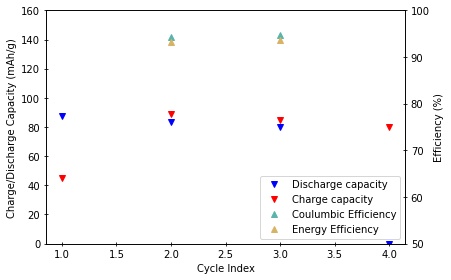

In [102]:
fig, ax = plt.subplots(1, 1)

ax.plot(sum_cycle_df['Cycle'], sum_cycle_df['Discharge-SCap/mAh/g'],'bv',label='Discharge capacity') 
ax.plot(sum_cycle_df['Cycle'], sum_cycle_df['Charge-SCap/mAh/g'], 'rv',label='Charge capacity')
    
ax.set_ylabel('Charge/Discharge Capacity (mAh/g)')
ax.set_xlabel('Cycle Index')
ax.set_ylim(0, 160)


ax2 = ax.twinx()
ax2.plot(sum_cycle_df['Cycle'], sum_cycle_df['Coulombic_Efficiency'],'^', c=(90/255,180/255,172/255), label='Coulumbic Efficiency')
ax2.plot(sum_cycle_df['Cycle'], sum_cycle_df['Energy_Efficiency'],'^', c=(216/255,179/255,101/255), label='Energy Efficiency')
ax2.set_xlabel('Cycle Index')
ax2.set_ylabel('Efficiency (%)')
ax2.set_ylim(50, 100)

ax2.tick_params(axis='y',direction='inout')   

#comment out if you want two separate legends
lines, labels = ax.get_legend_handles_labels()       
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

#uncomment if you want two legends
# ax.legend(loc='upper left')
# ax2.legend(loc='lower right') 

ax.tick_params(axis='both',direction='inout')
fig.tight_layout()
fig.set_size_inches(1.61803398875*4, 4,forward=True)
plt.savefig('../Graphs/Galv/LHCE/'+file_name2+'DCC_CE_EE.png', transparent=True,dpi=500)    
plt.show()

## Plot Voltage vs Capacity - Work in Progress

In [108]:
#fig, ax = plt.subplots(1, 1)
#cycles_to_plot=4000
#
#if sum_cycle_df['Cycle'].max()<cycles_to_plot:
#    cycles_to_plot=sum_cycle_df['Cycle'].max()
#    order=cycles_to_plot
#    print(cycles_to_plot)
#    for x in range(cycles_to_plot):
#        tint=(x/(cycles_to_plot+5))
#            
#        if x==0:
#            farg=(1,0,0)
#        else:
#            farg=(0,0,0) #tint,tint,tint
#        order+=-1
#        for y in ['C','D']:
#
#            Cycle_Add_1=sum_cycle_df['Cycle']==x+1
#            C_DC_R_condition = sum_cycle_df['C/DC/R']==y                        
#                         
#ax.plot(sum_cycle_df[(Cycle_Add_1) & (C_DC_R_condition)]
#        [['SCapacity/mAh/g']],
#        sum_cycle_df[(Cycle_Add_1) & (C_DC_R_condition)]
#        [['Voltage/V']],linewidth=0.5,c=farg,zorder=order)            
#            
#ax.set_xlabel('Capacity (mAh/g)')
#ax.set_ylabel('Potential (V)')
#
##sum_cycle_df[(sum_cycle_df['Cycle']==1) & (battery_dict['C/DC/R']=='C')][['SCapacity/mAh/g','Voltage/V','Cycle']].to_csv('../Graphs/Galv/'+battery_name+'/'+battery_name+'_Cap_vs_V.csv')
#
#fig.set_size_inches(1.61803398875*4, 4,forward=True)
#plt.savefig('../Graphs/Galv/LHCE/'+file_name2+'Capacity_vs_Potential.png', transparent=True,dpi=500)    
#        
#plt.show()